#PART 1

In [9]:
!pip install Counter

In [1]:
import string
from collections import Counter

In [6]:
!pip install GetOldTweets3

In [2]:
#before the outbreak
def get_tweets():
    import GetOldTweets3 as got
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('coronavirus') \
        .setSince("2020-01-01") \
        .setUntil("2020-01-30") \
        .setMaxTweets(100)
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [3]:
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

lower_case = text.lower()

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

tokenized_words = cleaned_text.split()

In [4]:
text_tweets

[['The continuing 2019-nCoV epidemic threat of novel coronaviruses to global health - The latest 2019 novel coronavirus outbreak in Wuhan, China 継続的新型コロナウイルス2019-nCoV流行による世界的な健康脅威-中国武漢での2019新型コロナウイルス（2019-nCoV）発生 '],
 ['15,000 Hong Kong Medical Workers Threaten Strike Unless Border Closed to Coronavirus | Breitbart '],
 ['en esta ciudad peleando contra el coronavirus y el dengue y el zika reproduciendose en ese matorral que pena,donde estan las empresas que les corresponde esa tarea.noticiero a nivel nacional'],
 ['Coronavirus parece ser ahora una buena excusa para ser un pedazo de racista de mierda'],
 ['Ghassan Charbel - Where Failure Is More Dangerous Than Coronavirus '],
 ['"Air Canada temporarily suspends all flights to Beijing and Shanghai amid coronavirus concerns" '],
 ['Until the coronavirus is completely gone...this how mf’ers gonna be acting '],
 ['Todos asustándonos por el Coronavirus, mientras que uno le juega al cabrón sin haberme vacunado contra la Influenza.'],
 ['Iberi

In [10]:
!pip install stopwords

  Created wheel for stopwords: filename=stopwords-0.1.3-py2.py3-none-any.whl size=37292 sha256=446e67a715816012fc8621e89e8db02cea47a87589996f200389a5119a7bef53
  Stored in directory: c:\users\parul\appdata\local\pip\cache\wheels\d7\4c\45\ca0b0cc6e2596fad1a411a3b8f7c119c149bc9e508788db715
Successfully built stopwords


In [5]:
import nltk

In [6]:
from nltk.corpus import stopwords

In [7]:
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
finalwords=[word for word in tokenized_words if word not in stopwords]

In [10]:
finalwords

['help',
 'spread',
 'corona',
 'virus',
 'china',
 'wuhan',
 'health',
 'coronavirus',
 'gt',
 'im',
 'apocalypse',
 'american',
 'student',
 'trapped',
 'coronavirushit',
 'chinese',
 'city',
 'article',
 'amp',
 'reuters',
 'here’s',
 'running',
 'list',
 '19',
 'countries',
 'confirmed',
 'coronavirus',
 'case',
 'httpsfrnewsngheresarunninglistof19countrieswithaconfirmedcoronaviruscase',
 'breaking',
 'cases',
 'new',
 'coronavirus',
 'registered',
 'chinese',
 'regions',
 'authorities',
 'httpssptnknewsbkqx',
 '1',
 'mars',
 '2',
 'twix',
 'coronavirus',
 'two',
 'fue',
 'lo',
 'más',
 'estúpido',
 'que',
 'pudieron',
 'hacer',
 'tanto',
 'chingar',
 'con',
 'la',
 'mamá',
 'para',
 'que',
 'le',
 'diera',
 'el',
 'coronavirus',
 'se',
 'petateara',
 'alv',
 'wiki',
 'correct',
 'china',
 'reports',
 '170',
 'deaths',
 '2019ncov',
 '7711',
 'cases',
 'virus',
 'confirmed',
 'china',
 'including',
 '31',
 'severe',
 '12167',
 'suspected',
 'cases',
 'httpwwwnhcgovcnxcsyqfkdt202001e

In [14]:
emotions = []
with open('emotion.text', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in finalwords:
            emotions.append(emotion)

w = Counter(emotions)
print(w)

Counter({' sad': 2, ' fearful': 2, ' entitled': 2, ' attracted': 1, ' anxious': 1, ' happy': 1})


In [17]:
#after the outbreak
def have_tweets():
    import GetOldTweets3 as got
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('coronavirus') \
        .setSince("2020-03-20") \
        .setUntil("2020-04-20") \
        .setMaxTweets(100)
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [26]:
text = ""
txt_tweets = have_tweets()

length = len(txt_tweets)

for i in range(0, length):
    text = txt_tweets[i][0] + " " + text

lowercase = text.lower()

cleanedtext = lowercase.translate(str.maketrans('', '', string.punctuation))

tokenizedwords = cleanedtext.split()

In [27]:
txt_tweets

[['#Pharmacies instituting anti-hoarding measures for possible #coronavirus treatments: https://hubs.ly/H0pkhbV0 | @Benefits_PRO'],
 ['Countries like the UK that have closed schools to help stop the spread of coronavirus should ask hard questions about whether this is now the right policy, says one team of scientists. What are your thoughts on this? '],
 ['10.088 contagiados, 358 nuevos casos, 133 fallecidos, 373 en UCI, 312 en ventilación mecánica y 96 en estado crítico #Covid19Chile #coronavirus #QuedateEnCasa pq insisten que los recuperados son absolutamente inmunes?? #PreguntaSeria'],
 ['COMPLETAMOS EN COLOMBIA ESTA SEMANA 3.792 CONTAGIADOS Y 179 MUERTOS,POR CORONAVIRUS. http://www.diarionacional.co/index.php/crear-un-articulo-nuevo/root/actualidad-mundial/36-avances/14386-completamos-en-colombia-esta-semana-2-852-contagiados-y-112-muertos-por-coronavirus'],
 ['Someone better take the wheel because the the cars about to hit the wall. WHO warning: No evidence antibody tests can show

In [28]:
final_words=[word for word in tokenizedwords if word not in stopwords]

In [29]:
final_words

['u',
 'ever',
 'time',
 'ate',
 'turkey',
 'wheel',
 'cannot',
 'catch',
 'coronavirus',
 'ahora',
 'con',
 'la',
 'pandemia',
 'del',
 'coronavirus',
 'es',
 'el',
 'responsable',
 'de',
 'las',
 'residencias',
 'públicas',
 'de',
 'ancianos',
 'le',
 'visto',
 'preocuparse',
 'visitar',
 'alguna',
 'yo',
 'ni',
 'nadie',
 'dos',
 'hombres',
 'fallecieron',
 '102',
 'personas',
 'resultaron',
 'este',
 'domingo',
 'casos',
 'positivos',
 'del',
 'nuevo',
 'coronavirus',
 'en',
 'el',
 'país',
 'informó',
 'el',
 'ministerio',
 'de',
 'salud',
 'de',
 'la',
 'nación',
 'en',
 'su',
 'reporte',
 'vespertino',
 'can’t',
 'pay',
 'rent',
 'coronavirus',
 'site',
 'help',
 'explain',
 'rights',
 'landlord',
 'believe',
 'lot',
 'precautions',
 'taken',
 'due',
 'coronavirus',
 'still',
 'affect',
 'susocialwork',
 'si',
 'entras',
 'en',
 'la',
 'pagina',
 'ves',
 'q',
 'la',
 'mayoria',
 'de',
 'comentarios',
 'tiene',
 '2',
 'mil',
 'menos',
 'gustaahoracomo',
 'ponga',
 'en',
 'el',
 '

In [30]:
emotionlist = []
with open('emotion.text', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotionlist.append(emotion)

y = Counter(emotionlist)
print(y)

Counter({' attached': 1, ' sad': 1, ' fearless': 1, ' attracted': 1, ' ecstatic': 1, ' adequate': 1, ' powerless': 1, ' happy': 1})


In [15]:
import matplotlib.pyplot as plt 

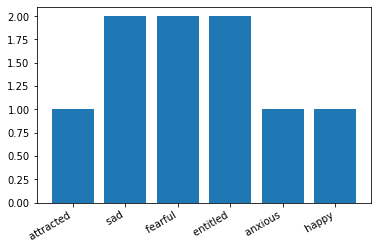

In [16]:
#before breakdown
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

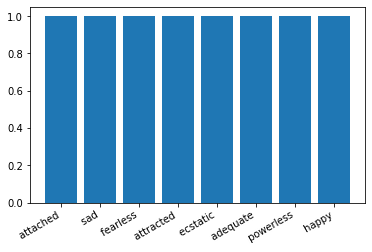

In [31]:
#after breakdown
fig, ax1 = plt.subplots()
ax1.bar(y.keys(),y.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

#PART 2